# <center>${\textbf{Artificial Intelligence Decision Support System}}$<br>${\textbf{ for Groundwater Management under Climate Change:}}$</center><br><center>${\textbf{ Application to Mornag Region in Tunisia}}$</center><br><center>${\textbf{Part 4 : Deployment Using XGBoost}}$</center>


**Table of Contents**

* [Importing Libraries](#libraris)
* [Forecasting under Climate Change scenarios](#cc)
    * [Representative Concentration Pathway :RCP 4.5](#rcp4.5_1)
    * [Representative Concentration Pathway :RCP 8.5](#rcp8.5_1)

    

<a id="libraries"></a>

${\textbf{Importing Libraries}}$

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


import xgboost as xgb
import tensorflow as tf

import pickle

import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
XGBModel = pickle.load(open('./Pickles/Models/XGBmodel.pkl', 'rb'))
Historical_Data = pd.read_pickle('./Pickles/Data/Historical_Data.pkl')

<a id="cc"></a>

## ${\textbf{XGBoost Forecasting under Climate Change scenarios}}$

<a id="rcp4.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 4.5 }}$

In [3]:
RCP45 = pd.read_pickle('./Pickles/Data/RCP45.pkl')
del RCP45['Mean']

In [4]:
lb_make = LabelEncoder()
RCP45["Piezometer"] = lb_make.fit_transform(RCP45["Piezometer"])
lb_make1 = LabelEncoder()
RCP45["Pluviometer"] = lb_make1.fit_transform(RCP45["Pluviometer"])
lb_make2 = LabelEncoder()
RCP45["SPI_classes"] = lb_make2.fit_transform(RCP45["SPI_classes"])

In [5]:
dtest = xgb.DMatrix(RCP45)
y_pred = XGBModel.predict(dtest, ntree_limit=XGBModel.best_ntree_limit)

RCP45["Piezometer"] = lb_make.inverse_transform(RCP45["Piezometer"])
RCP45["Pluviometer"] = lb_make1.inverse_transform(RCP45["Pluviometer"])
RCP45["SPI_classes"] = lb_make2.inverse_transform(RCP45["SPI_classes"])
RCP45["Pz"]=y_pred

In [6]:
RCP45[RCP45.Piezometer=="UCP Ennajah_494"]

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Lat,Lon,Lat_Pluviometer,Lon_Pluviometer,Month,Year,Pz
date,,,,,,,,,,,,,,,,
2009-01-01,UCP Ennajah_494,FOUCHANA FERME GAMOU,411.898182,273.444545,158.488182,32.339427,3,0.035855,Moderately Wet,36.66769,10.268092,36.69056,-10.18028,1,2009,14.435843
2009-02-01,UCP Ennajah_494,FOUCHANA FERME GAMOU,411.898182,273.444545,158.488182,58.941928,3,2.144342,Extremely wet,36.66769,10.268092,36.69056,-10.18028,2,2009,14.415650
2009-03-01,UCP Ennajah_494,FOUCHANA FERME GAMOU,411.898182,273.444545,158.488182,58.930666,3,1.447609,Very wet,36.66769,10.268092,36.69056,-10.18028,3,2009,14.417543
2009-04-01,UCP Ennajah_494,FOUCHANA FERME GAMOU,411.898182,273.444545,114.956364,19.653141,3,-0.618034,Moderately dry,36.66769,10.268092,36.69056,-10.18028,4,2009,14.442677
2009-05-01,UCP Ennajah_494,FOUCHANA FERME GAMOU,411.898182,273.444545,114.956364,51.607003,3,0.640998,Moderately Wet,36.66769,10.268092,36.69056,-10.18028,5,2009,14.436757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-08-01,UCP Ennajah_494,MORNEG FERME ESSADIR,278.813636,132.886364,43.664545,13.523901,3,-1.321987,Severely dry,36.66769,10.268092,36.66806,-10.27917,8,2100,13.558230
2100-09-01,UCP Ennajah_494,MORNEG FERME ESSADIR,278.813636,132.886364,43.664545,15.448640,3,-0.849488,Moderately dry,36.66769,10.268092,36.66806,-10.27917,9,2100,13.560658
2100-10-01,UCP Ennajah_494,MORNEG FERME ESSADIR,278.813636,132.886364,89.221818,21.931144,3,-0.362654,Moderately dry,36.66769,10.268092,36.66806,-10.27917,10,2100,12.113544


<a id="rcp8.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 8.5}}$

In [7]:
RCP85 = pd.read_pickle('./Pickles/Data/RCP85.pkl')
del RCP85['Mean']


In [8]:
lb_make = LabelEncoder()
RCP85["Piezometer"] = lb_make.fit_transform(RCP85["Piezometer"])
lb_make1 = LabelEncoder()
RCP85["Pluviometer"] = lb_make1.fit_transform(RCP85["Pluviometer"])
lb_make2 = LabelEncoder()
RCP85["SPI_classes"] = lb_make2.fit_transform(RCP85["SPI_classes"])

In [9]:
dtest = xgb.DMatrix(RCP85)
y_pred = XGBModel.predict(dtest, ntree_limit=XGBModel.best_ntree_limit)
RCP85["Piezometer"] = lb_make.inverse_transform(RCP85["Piezometer"])
RCP85["Pluviometer"] = lb_make1.inverse_transform(RCP85["Pluviometer"])
RCP85["SPI_classes"] = lb_make2.inverse_transform(RCP85["SPI_classes"])
RCP85["Pz"]=y_pred

In [10]:
RCP85[RCP45.Piezometer=="UCP Ennajah_494"]

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Lat,Lon,Lat_Pluviometer,Lon_Pluviometer,Month,Year,Pz
date,,,,,,,,,,,,,,,,
2009-01-01,UCP Ennajah_494,FOUCHANA FERME GAMOU,354.381818,216.021818,134.808182,7.612261,3,-0.113993,Moderately dry,36.66769,10.268092,36.69056,-10.18028,1,2009,14.692068
2009-02-01,UCP Ennajah_494,FOUCHANA FERME GAMOU,354.381818,216.021818,134.808182,34.728499,3,0.717884,Moderately Wet,36.66769,10.268092,36.69056,-10.18028,2,2009,14.684673
2009-03-01,UCP Ennajah_494,FOUCHANA FERME GAMOU,354.381818,216.021818,134.808182,37.733320,3,1.935683,Very wet,36.66769,10.268092,36.69056,-10.18028,3,2009,14.683816
2009-04-01,UCP Ennajah_494,FOUCHANA FERME GAMOU,354.381818,216.021818,81.213636,34.489011,3,-0.703142,Moderately dry,36.66769,10.268092,36.69056,-10.18028,4,2009,14.493036
2009-05-01,UCP Ennajah_494,FOUCHANA FERME GAMOU,354.381818,216.021818,81.213636,29.990556,3,-0.041153,Moderately dry,36.66769,10.268092,36.69056,-10.18028,5,2009,14.499341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-08-01,UCP Ennajah_494,MORNEG FERME ESSADIR,222.970909,100.570909,32.280909,1.897435,3,-1.126402,Severely dry,36.66769,10.268092,36.66806,-10.27917,8,2100,13.864006
2100-09-01,UCP Ennajah_494,MORNEG FERME ESSADIR,222.970909,100.570909,32.280909,13.937411,3,-0.963971,Moderately dry,36.66769,10.268092,36.66806,-10.27917,9,2100,13.846296
2100-10-01,UCP Ennajah_494,MORNEG FERME ESSADIR,222.970909,100.570909,68.290000,5.966344,3,-0.595071,Moderately dry,36.66769,10.268092,36.66806,-10.27917,10,2100,12.930255


UCP Ennajah_494


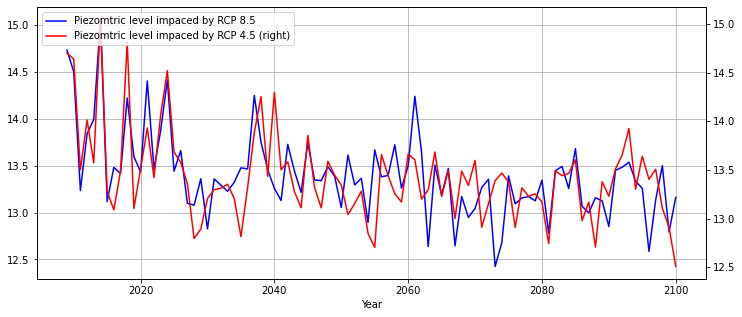

In [15]:
list_nom = ['UCP Ennajah_494']
# plt.rcParams['font.size'] = '16'
for d in list_nom:
    df=RCP85[RCP85.Piezometer==d]
    df1=RCP45[RCP45.Piezometer==d]

    print(d)
    df=df.reset_index()
    df.index=df.date
    plt.figure(figsize=(12,5))
    plt.xlabel('Number of requests every 10 minutes')

    ax1 = df.groupby('Year')['Pz'].mean().plot(color='blue', grid=True, label='Piezomtric level impaced by RCP 8.5')
    ax2 = df1.groupby('Year')['Pz'].mean().plot(color='red', grid=True, secondary_y=True, label='Piezomtric level impaced by RCP 4.5')
    
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()


    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()